# **LSTM RNN**

Problem : **IMDB movie review sentiment classification problem**

Each movie review is a variable sequence of words and the sentiment of each movie review must be classified. The problem is to determine whether a given movie review has a positive or negative sentiment.

Dataset : **IMDB dataset**
It contains 25,000 highly-polar movie reviews (good or bad) for training and the same amount again for testing.



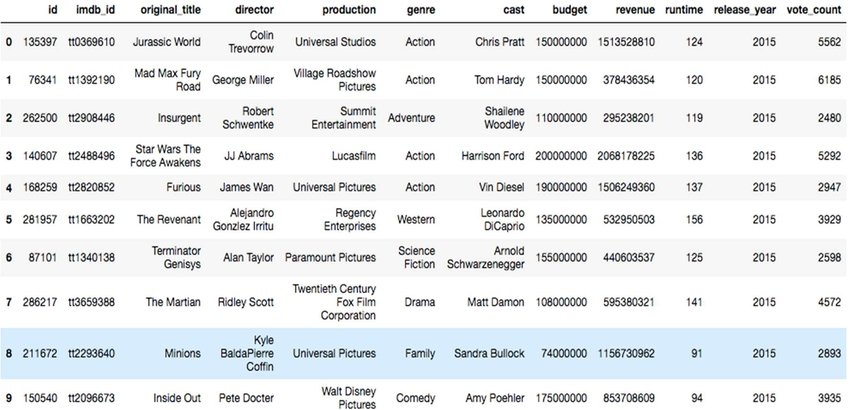

**Idea**
We will map each movie review into a real vector domain.
We will map each word onto a 32 length real valued vector. 
We will also limit the total number of words that we are interested in modeling to the 5000 most frequent words, and zero out the rest. 
Finally, the sequence length (number of words) in each review varies, so we will constrain each review to be 500 words, truncating long reviews and pad the shorter reviews with zero values.

_______

In [1]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

We need to load the IMDB dataset. We are constraining the dataset to the top 5,500 words. We also split the dataset into train (50%) and test (50%) sets

In [2]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')

x_train shape: (25000,)
y_train shape: (25000,)


Next, we need to truncate and pad the input sequences so that they are all the same length for modeling. The model will learn the zero values carry no information so indeed the sequences are not the same length in terms of content, but same length vectors is required to perform the computation in Keras.

In [4]:
# truncate and pad input sequences
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

**First layer** is the Embedded layer that uses 32 length vectors to represent each word

**Second layer** is the LSTM layer with 100 memory units

**Dense output layer** with a single neuron and a sigmoid activation function to make 0 or 1 predictions for the two classes (good and bad) in the problem.

In [7]:
# create the model
embedding_vecor_length = 32
model = Sequential()

#input layer
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

#second layer
model.add(LSTM(100))

#output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=64)

Epoch 1/3
391/391 [==============================] - 291s 740ms/step - loss: 0.5662 - accuracy: 0.6737 - val_loss: 0.3408 - val_accuracy: 0.8551
Epoch 2/3
391/391 [==============================] - 293s 749ms/step - loss: 0.3295 - accuracy: 0.8616 - val_loss: 0.3648 - val_accuracy: 0.8422
Epoch 3/3
391/391 [==============================] - 293s 750ms/step - loss: 0.2686 - accuracy: 0.8919 - val_loss: 0.3014 - val_accuracy: 0.8777


In [10]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.77%
